# 00 Init

## Mount

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Setting to use py files

In [2]:
import os

In [3]:
os.chdir('/content/drive/MyDrive/Minesweeper [RL]')

In [4]:
# check that os is in right directory
os.getcwd()

'/content/drive/MyDrive/Minesweeper [RL]'

In [5]:
! pip install codes

## Import py files

In [6]:
# baseline : Env, Agent
from codes.Agent.DQNAgentWithRules import *
from codes.Trainer.trainer import *
from codes.Environment.env4reward import *

In [14]:
from codes.Trainer.trainer import *

## Import Libraries

# 01 Info

## level dictionary

In [7]:
level = {'easy' : {'map_size':(9,9), 'n_mines' : 10},
         'medium' : {'map_size':(16,16), 'n_mines':40},
         'expert' : {'map_size':(16,30), 'n_mines':99}}

## HYPER PARAMETERS

In [8]:
# Environment settings
MEM_SIZE = 50000
MEM_SIZE_MIN = 1000

# Learning settings
BATCH_SIZE = 64
LEARNING_RATE = 0.01
LEARN_DECAY = 0.999975
LEARN_MIN = 0.001
DISCOUNT = 0.1

# Exploration settings
EPSILON = 0.95
EPSILON_DECAY = 0.99975
EPSILON_MIN = 0.01

# DQN settings
CONV_UNITS = 64
UPDATE_TARGET_EVERY = 5

# 02 Train, Valid

In [9]:
env = MinesweeperEnv(map_size=level['easy']['map_size'],
                     n_mines=level['easy']['n_mines'],
                     rewards={'win':1, 'lose':-1, 'progress':0.3, 'guess':-0.3})
agent = Limited18DQNAgent(env=env, conv_units=CONV_UNITS)
# tester_agent = DQNAgent(env=env, conv_units=CONV_UNITS)

## TRAIN_PARAMETERS

In [10]:
EPISODES = 50000
PRINT_INTERVAL = 100
TRAIN_RENDER = False

TRAIN_INTERVALS = ['every timestep', 'every episodes']
TRAIN_INTERVAL = TRAIN_INTERVALS[0]

VALID_SAMPLE = 1000
VALID_INTERVAL = 10

Episode: [50000/400], Median progress: 4.00, Median reward: -1.60, Win rate : 0.00, Epsilon: 0.94
Episode: [50000/500], Median progress: 4.00, Median reward: -1.60, Win rate : 0.00, Epsilon: 0.83
Episode: [50000/600], Median progress: 4.00, Median reward: -1.45, Win rate : 0.00, Epsilon: 0.73
Episode: [50000/700], Median progress: 5.00, Median reward: -1.60, Win rate : 0.00, Epsilon: 0.64
Episode: [50000/800], Median progress: 4.00, Median reward: -1.30, Win rate : 0.00, Epsilon: 0.56
Episode: [50000/900], Median progress: 5.00, Median reward: -1.60, Win rate : 0.00, Epsilon: 0.49
Episode: [50000/1000], Median progress: 5.00, Median reward: -1.30, Win rate : 0.00, Epsilon: 0.42
Episode: [50000/1100], Median progress: 5.00, Median reward: -1.60, Win rate : 0.00, Epsilon: 0.36
Episode: [50000/1200], Median progress: 5.00, Median reward: -1.60, Win rate : 0.00, Epsilon: 0.32
Episode: [50000/1300], Median progress: 4.00, Median reward: -1.60, Win rate : 0.00, Epsilon: 0.28
Episode: [50000/

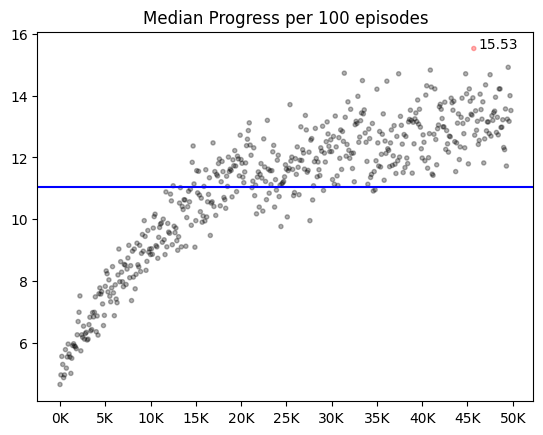

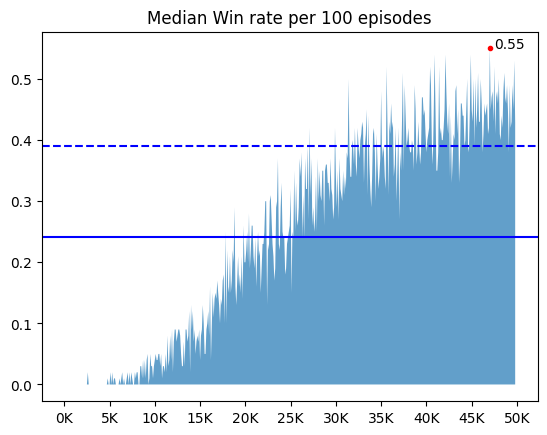

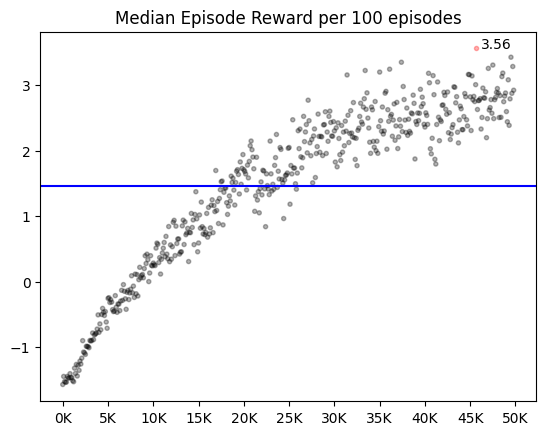

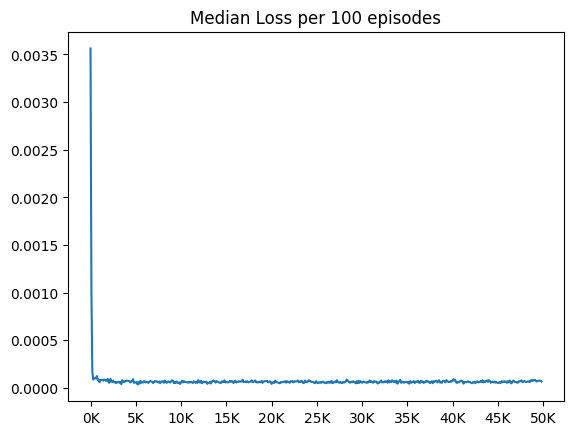

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/basicModelWithBiasAndRule'가 생성되었습니다.
모델이 저장되었습니다.


In [11]:
train = Trainer(env, agent, 'basicModelWithBiasAndRule')

Episode: [50000/100], Median progress: 12.00, Median reward: 2.00, Win rate : 0.35, Epsilon: 0.01
Valid n:1000, Median progress: 13.00, Median reward: 3.10, Win rate : 0.483
Valid n:1000, Median progress: 13.00, Median reward: 3.10, Win rate : 0.456
Valid n:1000, Median progress: 14.00, Median reward: 3.40, Win rate : 0.492
Valid n:1000, Median progress: 14.00, Median reward: 3.20, Win rate : 0.476
Valid n:1000, Median progress: 14.00, Median reward: 3.20, Win rate : 0.493
Valid n:1000, Median progress: 14.00, Median reward: 3.15, Win rate : 0.463
Valid n:1000, Median progress: 13.00, Median reward: 2.90, Win rate : 0.454
Valid n:1000, Median progress: 13.00, Median reward: 3.10, Win rate : 0.459
Valid n:1000, Median progress: 14.00, Median reward: 3.20, Win rate : 0.466
Valid n:1000, Median progress: 13.00, Median reward: 3.10, Win rate : 0.474
Episode: [50000/200], Median progress: 12.00, Median reward: 2.00, Win rate : 0.38, Epsilon: 0.01
Valid n:1000, Median progress: 13.00, Median

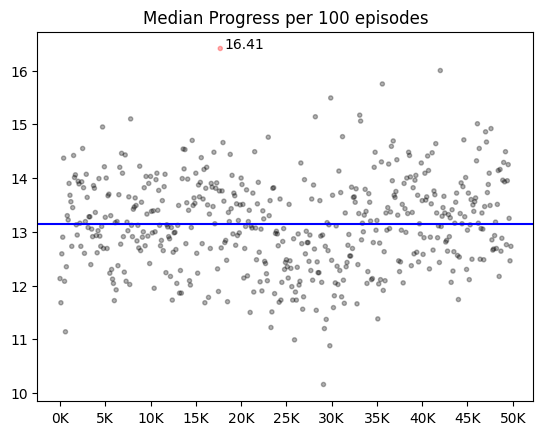

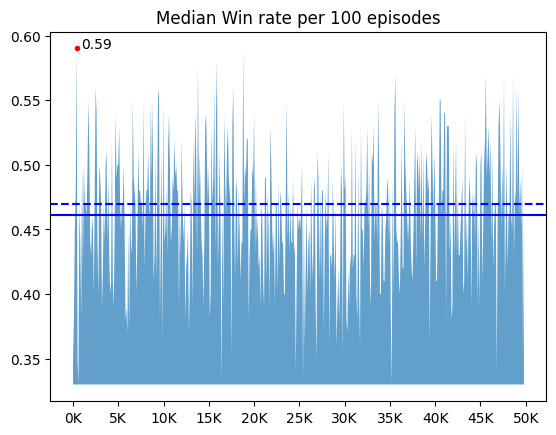

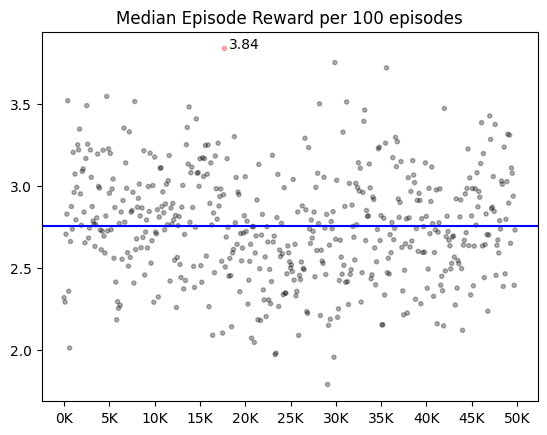

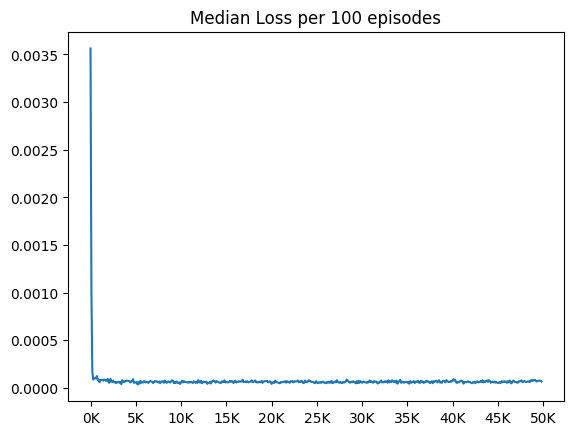

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/basicModelWithBiasAndRule'는 이미 존재합니다.
모델이 저장되었습니다.


In [16]:
train = Trainer(env, agent, 'basicModelWithBiasAndRule')

In [ ]:
train.train()
train.visualize_train()
train.save_model()

# 03 Test